# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn

import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
# checking head
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
# checking columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

there are 23 columns in the dataset including target column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
# checking shape
df.shape

(8425, 23)

dataset has 8425 rows and 23 columns

# Data Cleaning

In [7]:
# Checking for the null values:-

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Above observation shows that all features/columns are having null values except only Date and Location in the dataset.

In [8]:
# checking datatypes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Observations shows that some columns are object type and rest are integer and float type.

In [9]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2013-06-06',
       '2013-06-07', '2013-06-08'], dtype=object)

In [11]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [12]:
df['MinTemp'].unique()

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6,  8.4,  9.8, 14.1, 13.5, 11.2, 11.5, 17.1, 20.5, 15.3, 16.2,
       16.9, 20.1, 19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1,
       14. , 17. , 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4,
       18.8, 20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 21.7,
       23.5, 28.3, 18.4, 12.4, 13.3, 18. , 18.7, 15.5,  8.9, 15. , 15.4,
       16. , 12.8, 13.2, 13.8,  7.6,  8.3, 11. , 20.9, 16.4, 10. ,  8.8,
        9.3, 14.4, 10.8, 10.1,  9.1, 10.4, 12.2, 10.7,  7.8,  8.1,  7.5,
        8.2, 11.6, 13. ,  9.9,  3.5,  6.6,  7. ,  5.7,  6.2,  6. , 10.6,
        8.6,  4.5,  5.4,  2.1,  1.8,  7.2,  4.6,  4.2,  5.2,  4.1,  3.2,
        4.3,  3.7,  3.6,  6.9, 10.3,  3. ,  2.6,  5.1,  4.4,  4.7,  6.7,
        8. ,  2.2,  1.7,  2.8,  9. ,  6.3, -2. , -1.3,  2. ,  0.5,  1.2,
        0.6,  0.9,  5. ,  3.9,  3.4,  0. , -1.5, -1.7, -0.4,  0.1,  4.8,
        5.9,  2.9, -0.6, -0.3, -1. ,  0.8, -0.1,  1

In [13]:
df['MaxTemp'].unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

In [14]:
df['Rainfall'].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

In [15]:
df['Evaporation'].unique()
       

array([  nan,   8.6,   3.8,   2.8,   3.2,   6.8,   4.2,   1.6,   4.4,
         4. ,   2.2,   3.4,   6.4,   4.6,   3.6,   4.8,   3. ,   1.2,
         1.4,   2.6,   1. ,   2. ,   8.4,   2.4,   0.6,   5.4,   1.8,
         7. ,   0.8,   0.2,   5.2,   5. ,   6. ,   7.6,   5.8,   5.6,
         8. ,   6.2,   6.6,   7.8,   8.8,   7.4,   9.4,   7.2,   0.4,
         0. ,  18. ,  24.2,  14.6,  19.4,  10.8,  28. ,  11.8,  24.6,
        11.2,  22.6,  10. ,  37. ,  26. ,  11. ,  19.8,  24.4,  10.6,
        27.4,  12. ,  11.6,  24. ,   9. ,  23. ,  29.2,  20.6,  13.2,
        22.8,   9.8,  16. ,  20. ,  10.4,   9.6,  12.2,  15.4,  18.4,
        24.8,  20.8,  32. ,  55.4,  17.8,  16.2,  14.2,  59.2,  33.8,
        10.2, 145. ,  16.6,  47. ,  15.2,  15.8,  12.6,  11.4,   9.2,
        14.8,  13. ,   8.2,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        22.4,  18.6,  13.4,  17. ,  14. ,  14.4,  15. ,  15.6,   0.7])

In [16]:
df['Sunshine'].unique()

array([ nan,  9. ,  3.4,  6.1, 11. ,  7.1,  2.8,  6.7,  6.4,  6. ,  9.4,
        6.3, 11.1, 11.2, 11.4,  9.7,  7.9,  0.3,  0. ,  0.5,  3.5,  1.9,
        1.1,  7.8,  8.8,  1.8,  6.6,  3.1,  3. , 10.4, 10.5,  9.9,  9.5,
        1. ,  4.3,  9.2,  9.8,  4.8,  8.9,  4.5,  2.6, 10. , 10.2,  9.1,
        2.2,  0.4,  0.7,  0.2,  2.7,  8.5,  3.6,  2.5,  6.9,  8.2,  6.8,
        7.2,  9.6,  5.1,  5.8,  1.6,  0.6,  7.7,  8.3,  2.9,  8.4,  4.2,
        9.3,  4.7,  4.1,  5.3,  7.4,  7.3,  2.4, 10.6, 10.3, 10.1,  2.3,
       10.7,  8.6,  5.2, 10.9, 10.8,  8. ,  1.5,  8.7, 11.3, 11.5,  5.7,
       11.9,  3.3, 12.1, 12.4,  7. ,  4. , 11.7, 12.7, 12.5, 12.6, 13. ,
        5.5, 12.2, 11.6, 12.9, 13.1,  5.4,  3.7, 12. ,  2. ,  8.1, 13.2,
       13.6, 12.3, 11.8,  7.5,  6.2,  1.2,  3.8,  1.4,  5. ,  0.8,  4.4,
        6.5,  0.1,  4.9,  3.9,  4.6,  0.9,  5.9,  7.6,  1.3, 12.8, 13.4,
        1.7, 13.3,  3.2,  2.1, 13.5, 13.8, 13.9, 13.7,  5.6])

In [17]:
df['WindGustDir'].unique() 

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [18]:
df['WindGustSpeed' ].unique() 

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,  93.,   7.,  91.,  89., 102., 100.])

In [19]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [20]:
df['WindDir3pm'].unique()
       

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [21]:
df['WindSpeed9am'].unique()

array([20.,  4., 19., 11.,  7.,  6., 15., 17., 28., 24., nan,  9.,  0.,
       13.,  2., 26., 30., 22., 35., 37., 31., 33., 43., 41., 46., 39.,
       56., 54., 50., 52., 44., 61., 57., 48., 63.])

In [22]:
df['WindSpeed3pm'].unique()

array([24., 22., 26.,  9., 20., 17., 28., 11.,  6., 13., 30., 19., 31.,
        7., 15., 48.,  4., 33.,  0.,  2., nan, 37., 46., 39., 50., 35.,
       41., 44., 43., 65., 56., 83., 54., 61., 57., 52.])

In [23]:
df['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  30.,  23.,  nan,  31.,
        22.,  28.,  25.,  16.,  19.,  17.,  18.,  14.,  10.,  12.,  11.,
        24.,  26.,  15.])

In [24]:
df['Humidity3pm'].unique()
       

array([22., 25., 30., 16., 33., 23., 19.,  9., 27., 91., 93., 43., 32.,
       28., 82., 65., 26., 24., 17., 15., 70., 12.,  8., 31., 20., 10.,
       21., 39., 13., 11., 69., 18., 14., 35., 90., 68., 74., 41., 34.,
       78., 49., 37., 42., 47., 52., 29., 86., 89., 62., 79., 48., 46.,
       38., 44., 51., 36., 45., 40., 53., 61., 59., 63., 54., 57., 50.,
       58., 75., 97., 80., 95., 56., 72., 60., 71., 73., 81., 76., 64.,
       87., 85., 67., 55., 77., 84.,  7., 99., 92., 66., 83., 94., 96.,
       88., nan, 98.,  6.])

In [25]:
df['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

In [26]:
df['Pressure3pm'].unique()

array([1007.1, 1007.8, 1008.7, 1012.8, 1006. , 1005.4, 1008.2, 1010.1,
       1003.6, 1005.7, 1004.2,  993. , 1001.8, 1010.3, 1010.4, 1002.2,
       1009.7, 1017.1, 1014.8, 1008.1, 1007.6, 1001.7, 1003.4, 1005.1,
       1003.2, 1013.1, 1009.2, 1006.7, 1002.7, 1010.9, 1013.7, 1006.8,
       1012.1, 1006.9, 1012.7, 1017.4, 1016.2, 1010.6, 1004.8, 1005.9,
        997.8, 1003.9, 1014.6, 1014.1, 1011.6, 1011.8, 1010.2, 1010.5,
       1007.4, 1004.7, 1002.6, 1005. , 1003.8, 1006.5, 1008.5, 1011.1,
       1017.3, 1019.7, 1016.4, 1013.8, 1013.5, 1007.5, 1004.5, 1010.8,
       1012.4, 1013.4, 1015. , 1012.6, 1004.6, 1009. , 1012. , 1014.7,
       1015.9, 1018. , 1018.9, 1008. , 1013.2, 1013.9, 1013.6, 1014.4,
       1019.2, 1017.2, 1020.7, 1020.6, 1019.1, 1019.5, 1019.4, 1018.4,
       1012.9, 1019.3, 1016.5, 1019.6, 1023.5, 1023.4, 1017.7, 1020.3,
       1020.8, 1018.7, 1009.8, 1016.8, 1020. , 1020.9, 1021.6, 1015.7,
       1002.4, 1000.9, 1003.3, 1018.3, 1021.5, 1023.2, 1024. , 1025.9,
      

In [27]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

In [28]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

In [29]:
df['Temp9am'].unique()

array([16.9, 17.2, 21. , 18.1, 17.8, 20.6, 16.3, 18.3, 20.1, 20.4, 15.9,
       17.4, 15.8, 17.3, 18. , 15.5, 19.1, 24.5, 23.8, 20.9, 21.5, 23.2,
       26.6, 24.6, 21.6, 12.5, 19.7, 14.9, 17.1, 20.7, 22.4, 23.1, 25.2,
       17.9, 20.2, 22.8, 24.2, 24.3, 25.6, 27.6, 16. , 22. , 26.8, 27.3,
       26.1, 23.3, 21.2, 23.4, 25.8, 28.2, 29. , 29.2, 29.9, 32.4, 28.8,
       27.2, 25.5, 26.5, 28.7, 29.6, 34.5, 18.7, 16.7, 17. , 19.2, 21.4,
       22.1, 19.3, 15. , 20. , 22.2, 23. , 15.6, 13.9, 12.6, 13.3, 17.6,
       18.6, 19. , 19.9, 12.7, 12.2, 12.1, 14.7, 18.8, 15.4, 16.2, 16.5,
       14. , 16.6, 18.4, 12.9, 13.8, 15.1, 16.4, 16.1, 20.5,  9.6, 12.4,
       14.1, 11.2,  9.5,  7.6, 10.1,  8.2,  7.9,  7.2, 10.6, 10.3, 10. ,
        8.3, 11. ,  9.4, 11.7,  8.5,  9.1,  7.5, 13. ,  7. ,  8.8,  7.4,
       11.9, 11.6, 13.6,  7.1, 10.2,  8. ,  9.2, 11.3,  4.7,  6.8,  4.9,
        2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  6.9,  8.4,  9.8, 13.5,
        7.8,  2.3,  2.4,  3.3,  3.8,  4.8,  8.1,  9

In [30]:
df['Temp3pm'].unique()

array([21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25.5, 30.2, 28.2, 28.8,
       17. , 15.8, 19.8, 23.5, 26.2, 18.1, 21.5, 21. , 27.3, 31.6, 30.8,
       29. , 31.2, 33. , 32.1, 26.1, 18.2, 22.7, 25.7, 22.1, 33.9, 34.4,
       36.8, 38.4, 27.6, 26.6, 29.3, 30. , 33.2, 35.7, 41.5, 27.1, 25.8,
       30.5, 37.7, 36.1, 33.1, 36.5, 36.2, 39.2, 40.1, 41.2, 42. , 41.9,
       37.1, 35.2, 39.7, 41.6, 43.4, 38.5, 29.4, 24.9, 17.3, 28.5, 29.2,
       29.5, 27. , 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 33.6, 28.1,
       21.9, 21.4, 22. , 29.6, 18.8, 23.8, 19.7, 18.3, 20.5, 23.9, 27.2,
       32.6, 33.5, 31.4, 19.6, 27.7, 29.9, 30.9, 27.4, 20.3, 21.2, 20.9,
       21.6, 25. , 24.4, 23.1, 18.9, 19.4, 22.9, 23.6, 21.3, 22.3, 22.6,
       15.1, 14.5, 11.6,  9.4, 14. , 12.1, 16.1, 16.3, 19.1, 18.5, 18.4,
       19.2, 20.2, 17.7, 18. , 14.6, 15.3, 15.9, 14.7, 18.7, 21.7, 20.8,
       19.5, 17.4, 15.6, 16.7, 16.8, 13.4, 13. , 16.5, 10.2, 11.5, 11.4,
        7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16

In [31]:
df['RainToday'].unique() 

array(['No', 'Yes', nan], dtype=object)

In [32]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [33]:
df_g=df.copy()
df_g['WindGustDir'].fillna(df_g['WindGustDir'].value_counts().idxmax(), inplace=True)
df_g['WindDir9am'].fillna(df_g['WindDir9am'].value_counts().idxmax(), inplace=True)
df_g['WindDir3pm'].fillna(df_g['WindDir3pm'].value_counts().idxmax(), inplace=True)
df_g['RainToday'].fillna(df_g['RainToday'].value_counts().idxmax(), inplace=True)
df_g['RainTomorrow'].fillna(df_g['RainTomorrow'].value_counts().idxmax(), inplace=True)
df_g["MinTemp"].fillna(df_g["MinTemp"].mean(skipna=True), inplace=True)
df_g["MaxTemp"].fillna(df_g["MaxTemp"].mean(skipna=True), inplace=True)
df_g["Rainfall"].fillna(df_g["Rainfall"].mean(skipna=True), inplace=True)
df_g["Evaporation"].fillna(df_g["Evaporation"].mean(skipna=True), inplace=True)
df_g["Sunshine"].fillna(df_g["Sunshine"].mean(skipna=True), inplace=True)
df_g["WindGustSpeed"].fillna(df_g["WindGustSpeed"].mean(skipna=True), inplace=True)
df_g["WindSpeed9am"].fillna(df_g["WindSpeed9am"].mean(skipna=True), inplace=True)
df_g["WindSpeed3pm"].fillna(df_g["WindSpeed3pm"].mean(skipna=True), inplace=True)
df_g["Humidity9am"].fillna(df_g["Humidity9am"].mean(skipna=True), inplace=True)
df_g["Humidity3pm"].fillna(df_g["Humidity3pm"].mean(skipna=True), inplace=True)
df_g["Pressure9am"].fillna(df_g["Pressure9am"].mean(skipna=True), inplace=True)
df_g["Pressure3pm"].fillna(df_g["Pressure3pm"].mean(skipna=True), inplace=True)
df_g["Cloud9am"].fillna(df_g["Cloud9am"].mean(skipna=True), inplace=True)
df_g["Cloud3pm"].fillna(df_g["Cloud3pm"].mean(skipna=True), inplace=True)
df_g["Temp9am"].fillna(df_g["Temp9am"].mean(skipna=True), inplace=True)
df_g["Temp3pm"].fillna(df_g["Temp3pm"].mean(skipna=True), inplace=True)

In [34]:
df_g

Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
0     2008-12-01   Albury     13.4  22.900000       0.6     5.389395   
1     2008-12-02   Albury      7.4  25.100000       0.0     5.389395   
2     2008-12-03   Albury     12.9  25.700000       0.0     5.389395   
3     2008-12-04   Albury      9.2  28.000000       0.0     5.389395   
4     2008-12-05   Albury     17.5  32.300000       1.0     5.389395   
...          ...      ...      ...        ...       ...          ...   
8420  2017-06-21    Uluru      2.8  23.400000       0.0     5.389395   
8421  2017-06-22    Uluru      3.6  25.300000       0.0     5.389395   
8422  2017-06-23    Uluru      5.4  26.900000       0.0     5.389395   
8423  2017-06-24    Uluru      7.8  27.000000       0.0     5.389395   
8424  2017-06-25    Uluru     14.9  23.859976       0.0     5.389395   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0     7.632205           W      44.000000          W  ...        71.0   
1     7.632205         WNW      44.000000        NNW  ...        44.0   
2     7.632205         WSW      46.000000          W  ...        38.0   
3     7.632205          NE      24.000000         SE  ...        45.0   
4     7.632205           W      41.000000        ENE  ...        82.0   
...        ...         ...            ...        ...  ...         ...   
8420  7.632205           E      31.000000         SE  ...        51.0   
8421  7.632205         NNW      22.000000         SE  ...        56.0   
8422  7.632205           N      37.000000         SE  ...        53.0   
8423  7.632205          SE      28.000000        SSE  ...        51.0   
8424  7.632205           N      40.174469        ESE  ...        62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8         No            No  
1        24.3         No            No  
2        23.2         No            No  
3        26.5         No            No  
4        29.7         No            No  
...       ...        ...           ...  
8420     22.4         No            No  
8421     24.5         No            No  
8422     26.1         No            No  
8423     26.0         No            No  
8424     20.9         No            No  

[8425 rows x 23 columns]

In [35]:
df_g.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [36]:
df_g.shape

(8425, 23)

<Axes: >

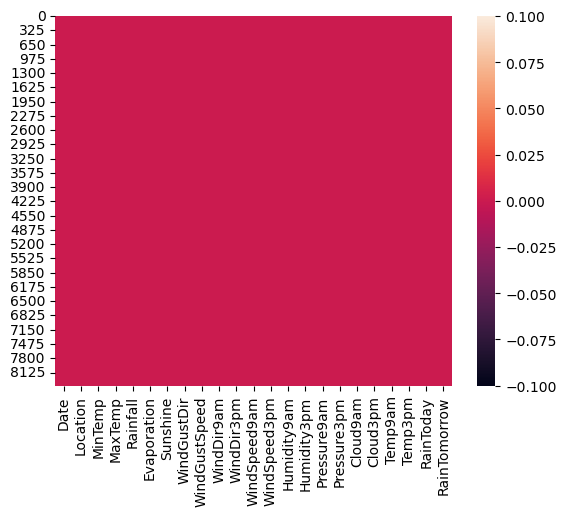

In [37]:
sns.heatmap(df_g.isnull())

No null values present in our data

# Expolatory Data Analysis (EDA)

In [38]:
df_g.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

In [39]:
df_g.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

In [40]:
df_g.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [41]:
df_g.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

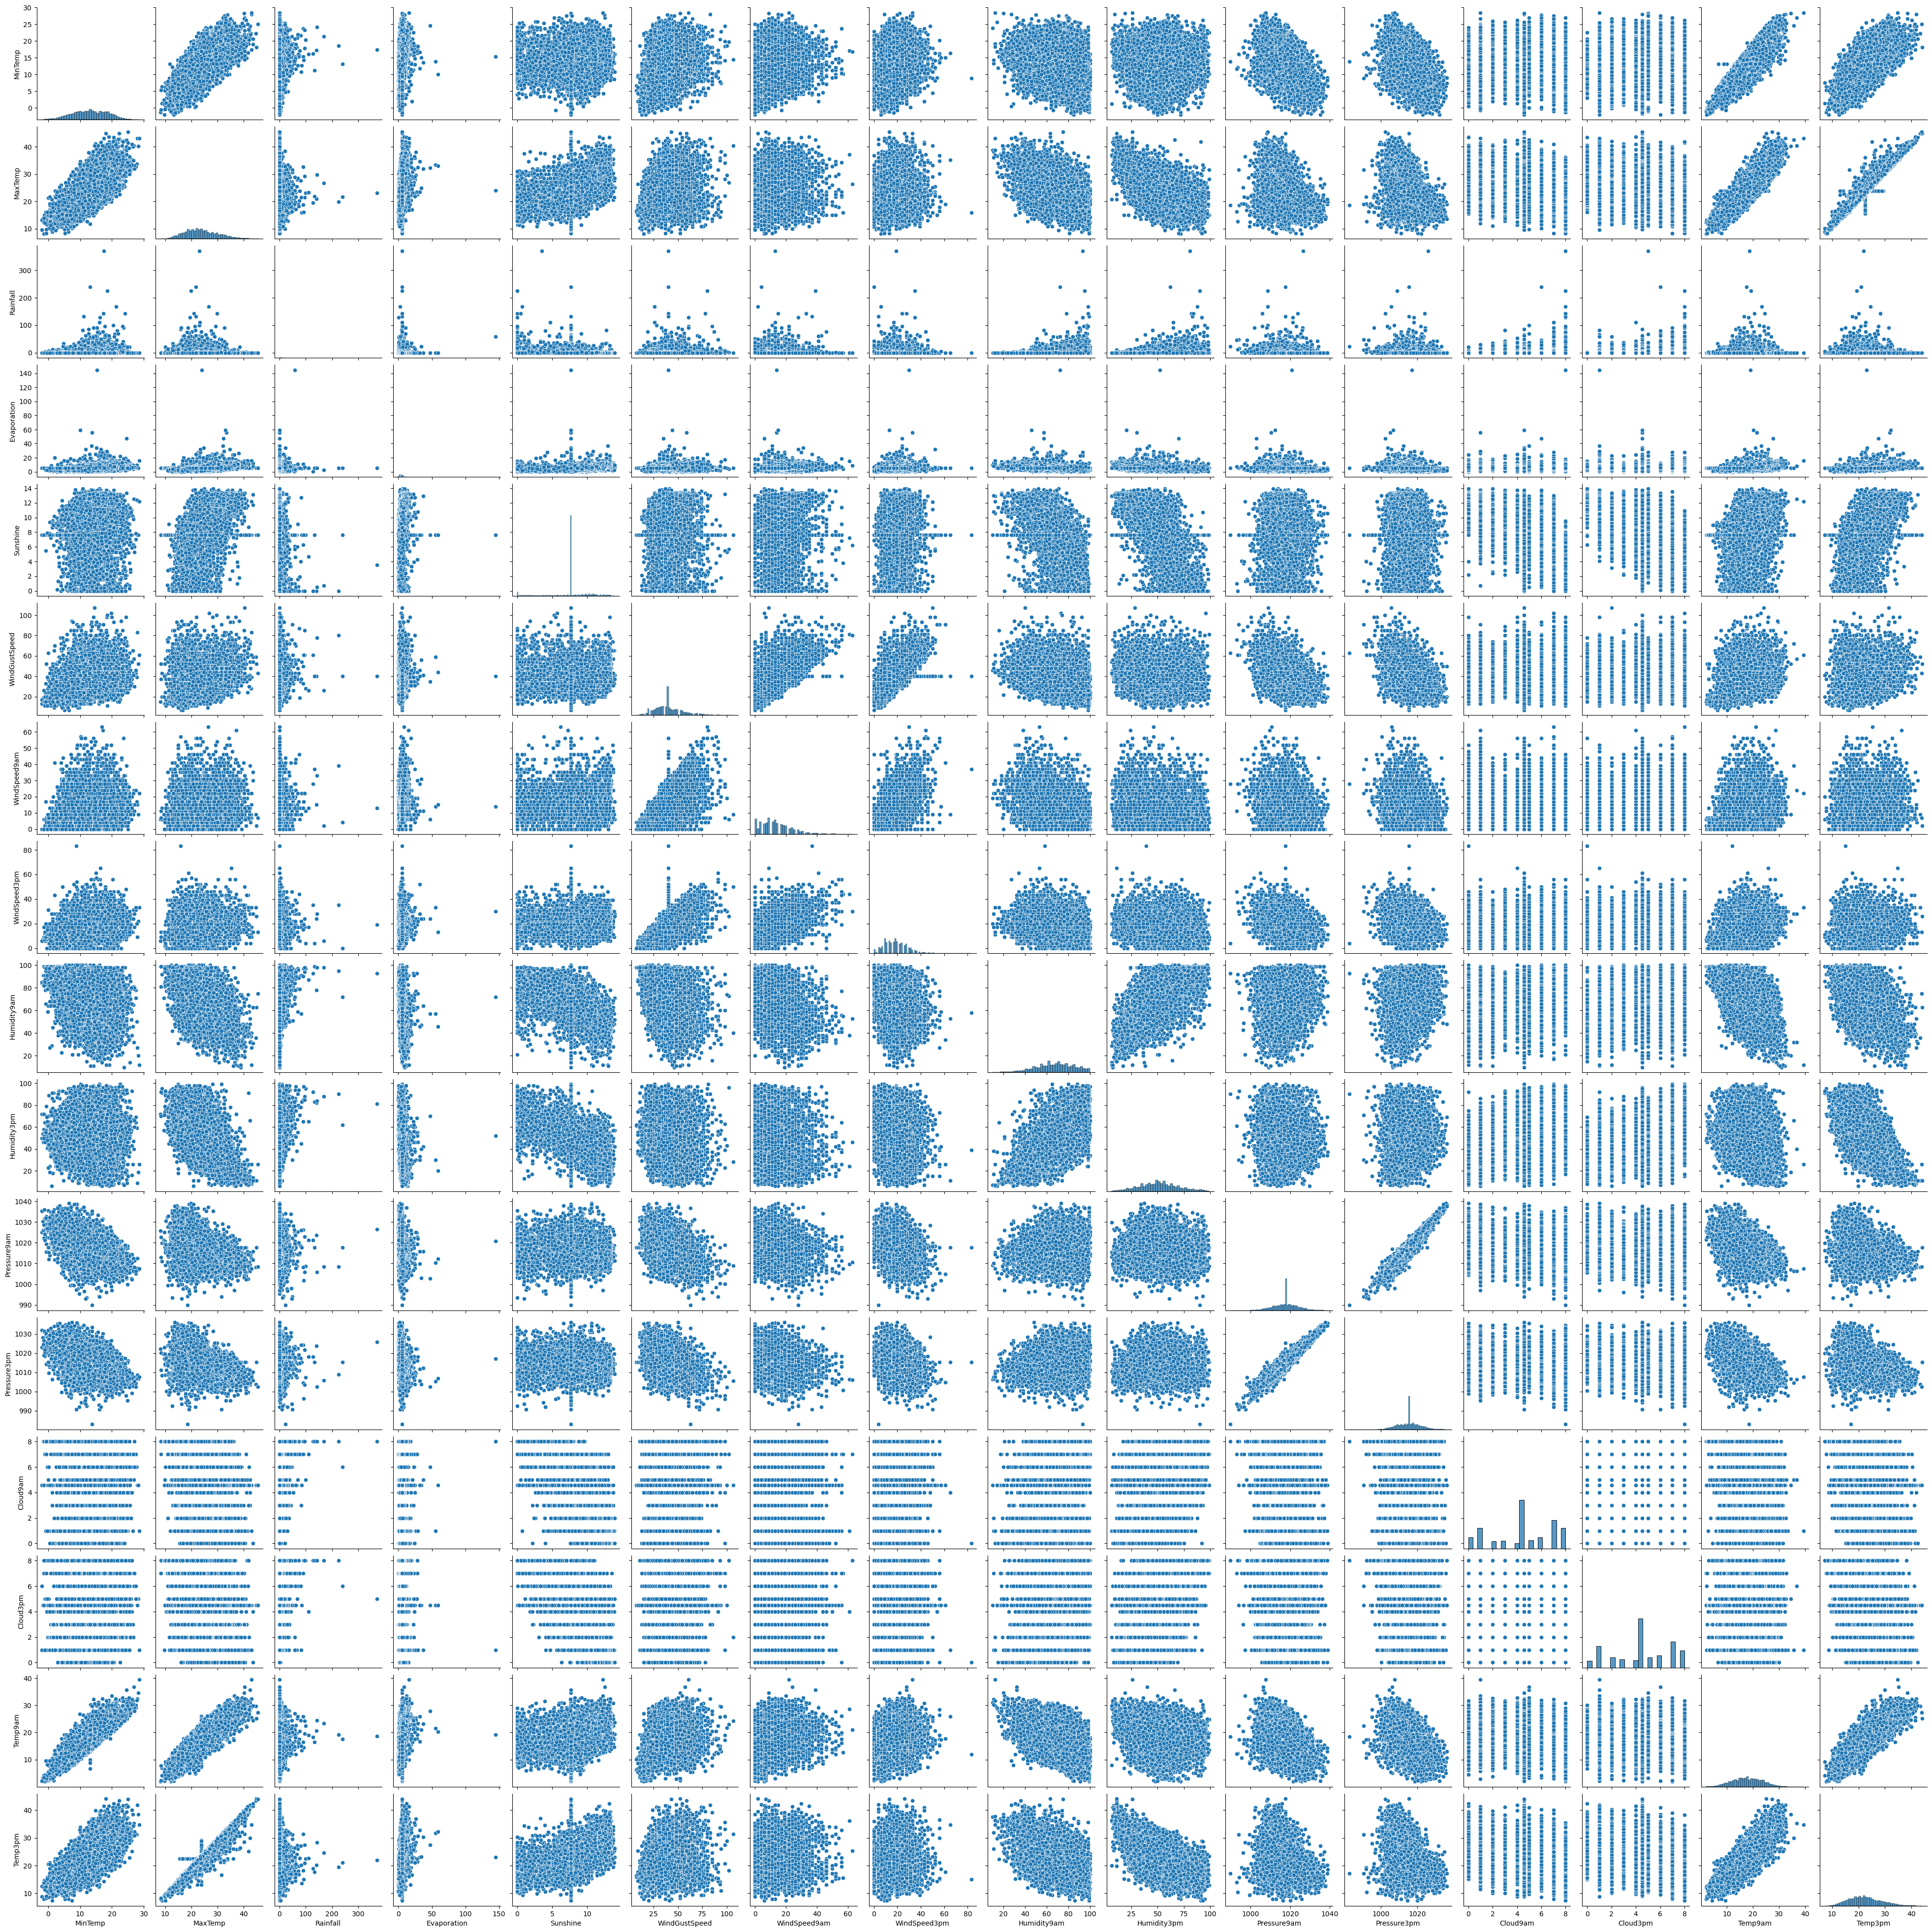

In [42]:
sns.pairplot(df_g)
plt.show()

In [43]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

val=['Date', 'Location','WindGustDir','WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']
for i in val:
    df_g[i]=le.fit_transform(df_g[i])

# Correlation

In [45]:
# 1. Checking the Correlation with respect to first target variable(RainTomorrow):-

df_g.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

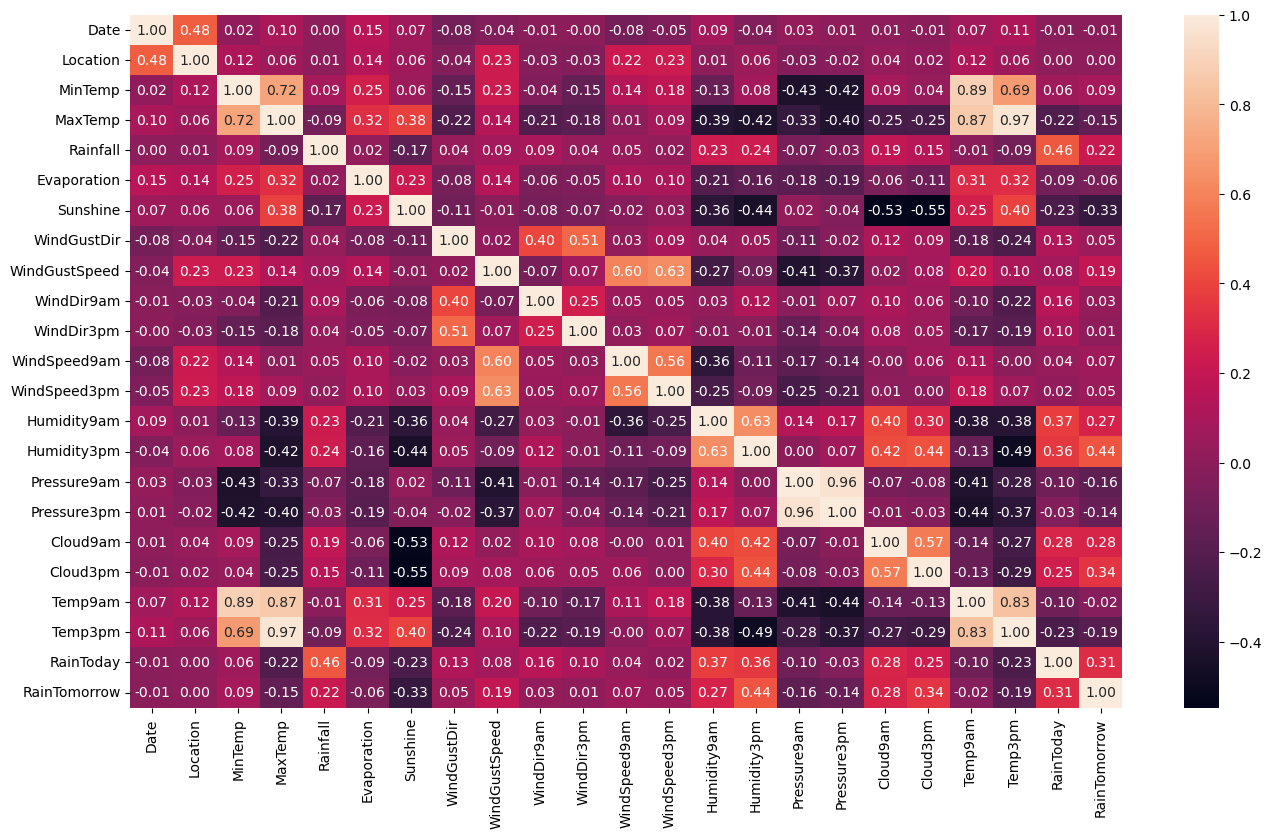

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(df_g.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows that 'Evaporation','Temp9am','Date','Location','WindDir3pm','WindDir9am','WindGustDir','WindSpeed3pm', 'WindSpeed9am' and 'MinTemp' are less correlated with the target variable.

Making new dataframe in terms of RainTomorrow analysis:-

In [47]:
df_g1=df_g.drop(['Evaporation','Temp9am','Date','Location','WindDir3pm','WindDir9am','WindGustDir','WindSpeed3pm',
                 'WindSpeed9am','MinTemp'],axis=1)
df_g1

MaxTemp  Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0     22.900000       0.6  7.632205      44.000000         71.0         22.0   
1     25.100000       0.0  7.632205      44.000000         44.0         25.0   
2     25.700000       0.0  7.632205      46.000000         38.0         30.0   
3     28.000000       0.0  7.632205      24.000000         45.0         16.0   
4     32.300000       1.0  7.632205      41.000000         82.0         33.0   
...         ...       ...       ...            ...          ...          ...   
8420  23.400000       0.0  7.632205      31.000000         51.0         24.0   
8421  25.300000       0.0  7.632205      22.000000         56.0         21.0   
8422  26.900000       0.0  7.632205      37.000000         53.0         24.0   
8423  27.000000       0.0  7.632205      28.000000         51.0         24.0   
8424  23.859976       0.0  7.632205      40.174469         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  \
0          1007.7       1007.1  8.000000  4.503183     21.8          0   
1          1010.6       1007.8  4.566622  4.503183     24.3          0   
2          1007.6       1008.7  4.566622  2.000000     23.2          0   
3          1017.6       1012.8  4.566622  4.503183     26.5          0   
4          1010.8       1006.0  7.000000  8.000000     29.7          0   
...           ...          ...       ...       ...      ...        ...   
8420       1024.6       1020.3  4.566622  4.503183     22.4          0   
8421       1023.5       1019.1  4.566622  4.503183     24.5          0   
8422       1021.0       1016.8  4.566622  4.503183     26.1          0   
8423       1019.4       1016.5  3.000000  2.000000     26.0          0   
8424       1020.2       1017.9  8.000000  8.000000     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             0  

[8425 rows x 13 columns]

In [48]:
df_g1.shape

(8425, 13)

In [49]:
df_g1.columns

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [50]:
# checking for the skewness:-

df_g1.skew()

MaxTemp           0.380654
Rainfall         13.218403
Sunshine         -0.716525
WindGustSpeed     0.757000
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

Above observations shows that 'Rainfall','Humidity9am' and 'Sunshine' are higly skewed.

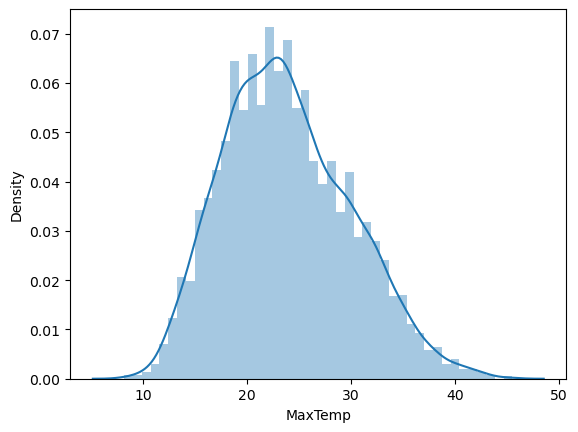

In [51]:
# checking with the distribution curve:-

sns.distplot(df_g1['MaxTemp'])
plt.show()

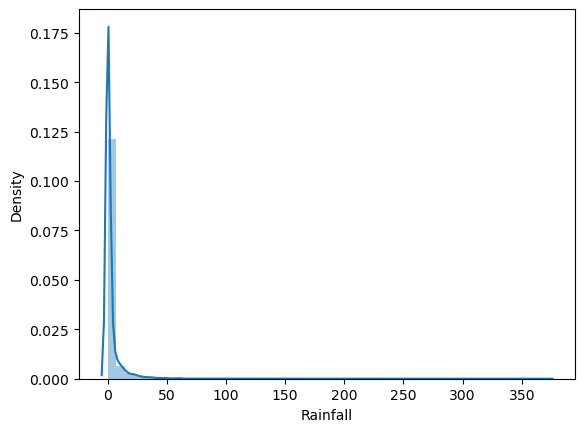

In [52]:
sns.distplot(df_g1['Rainfall'])
plt.show()

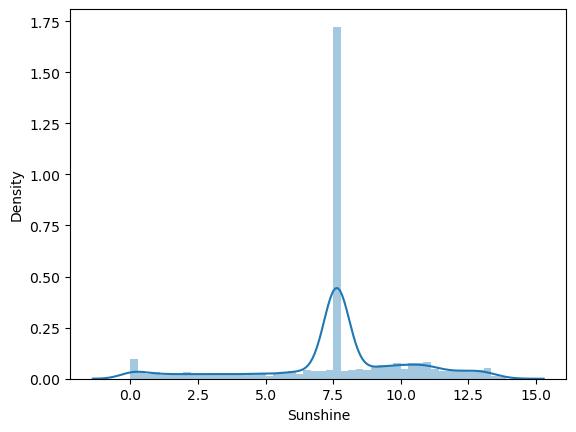

In [53]:
sns.distplot(df_g1['Sunshine'])
plt.show()

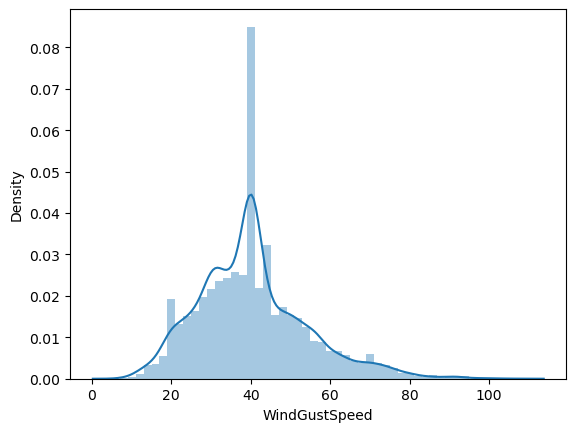

In [54]:
sns.distplot(df_g1['WindGustSpeed'])
plt.show()

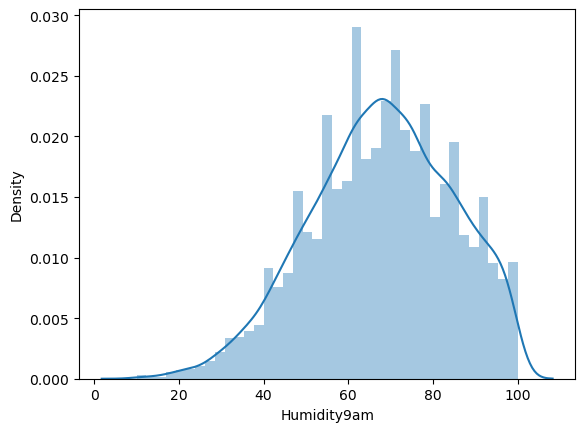

In [55]:
sns.distplot(df_g1['Humidity9am'])
plt.show()

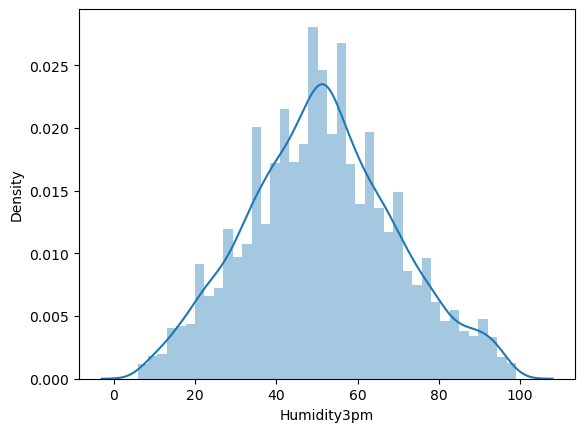

In [56]:
sns.distplot(df_g1['Humidity3pm'])
plt.show()

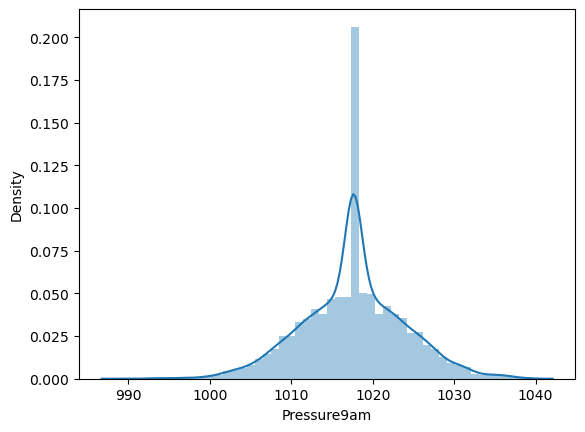

In [57]:
sns.distplot(df_g1['Pressure9am'])
plt.show()

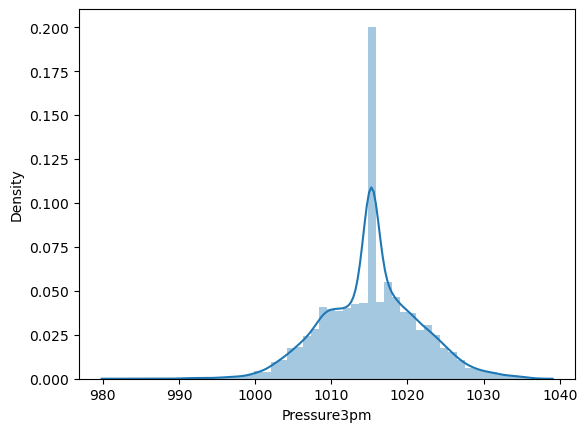

In [58]:
sns.distplot(df_g1['Pressure3pm'])
plt.show()

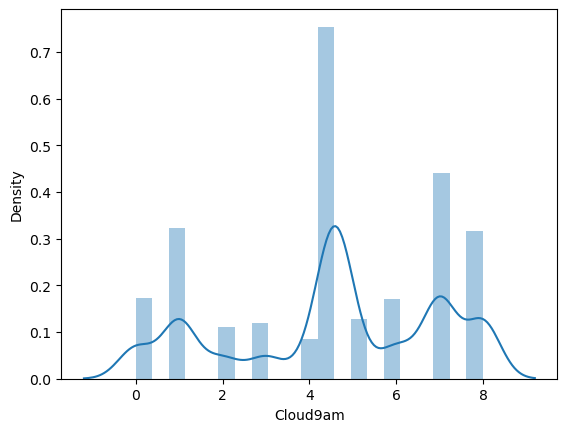

In [59]:
sns.distplot(df_g1['Cloud9am'])
plt.show()

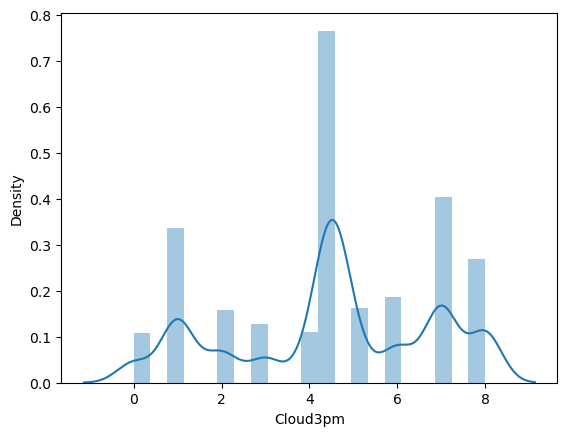

In [60]:
sns.distplot(df_g1['Cloud3pm'])
plt.show()

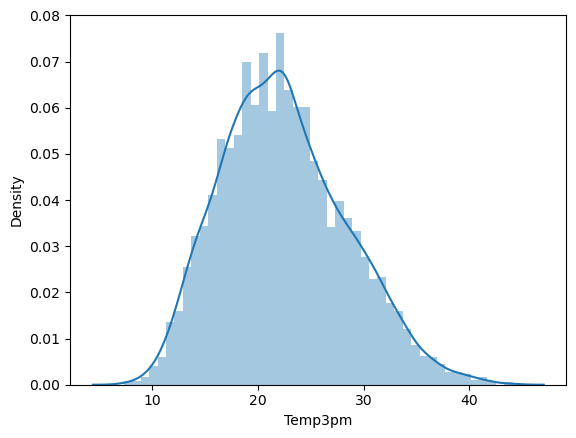

In [61]:
sns.distplot(df_g1['Temp3pm'])
plt.show()

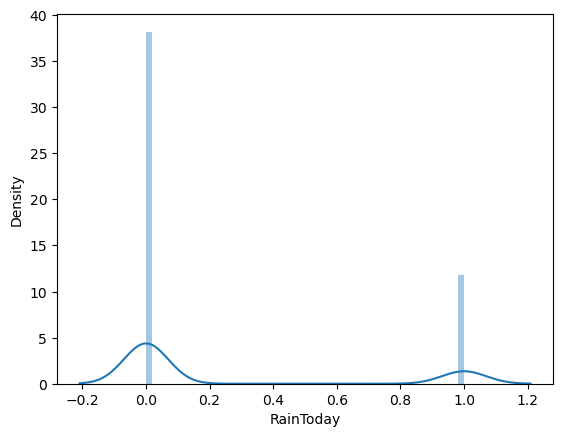

In [62]:
sns.distplot(df_g1['RainToday'])
plt.show()

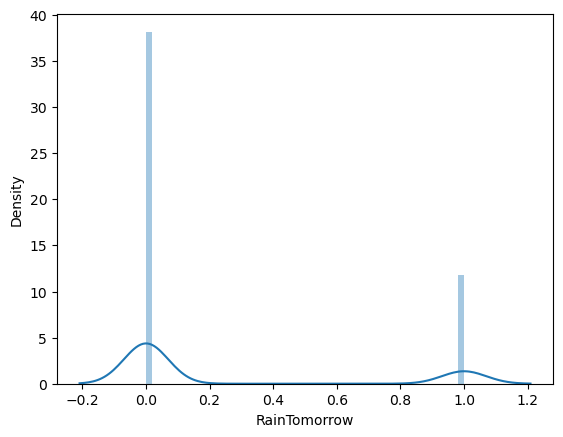

In [63]:
sns.distplot(df_g1['RainTomorrow'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed. The building blocks is out of normalized curve.

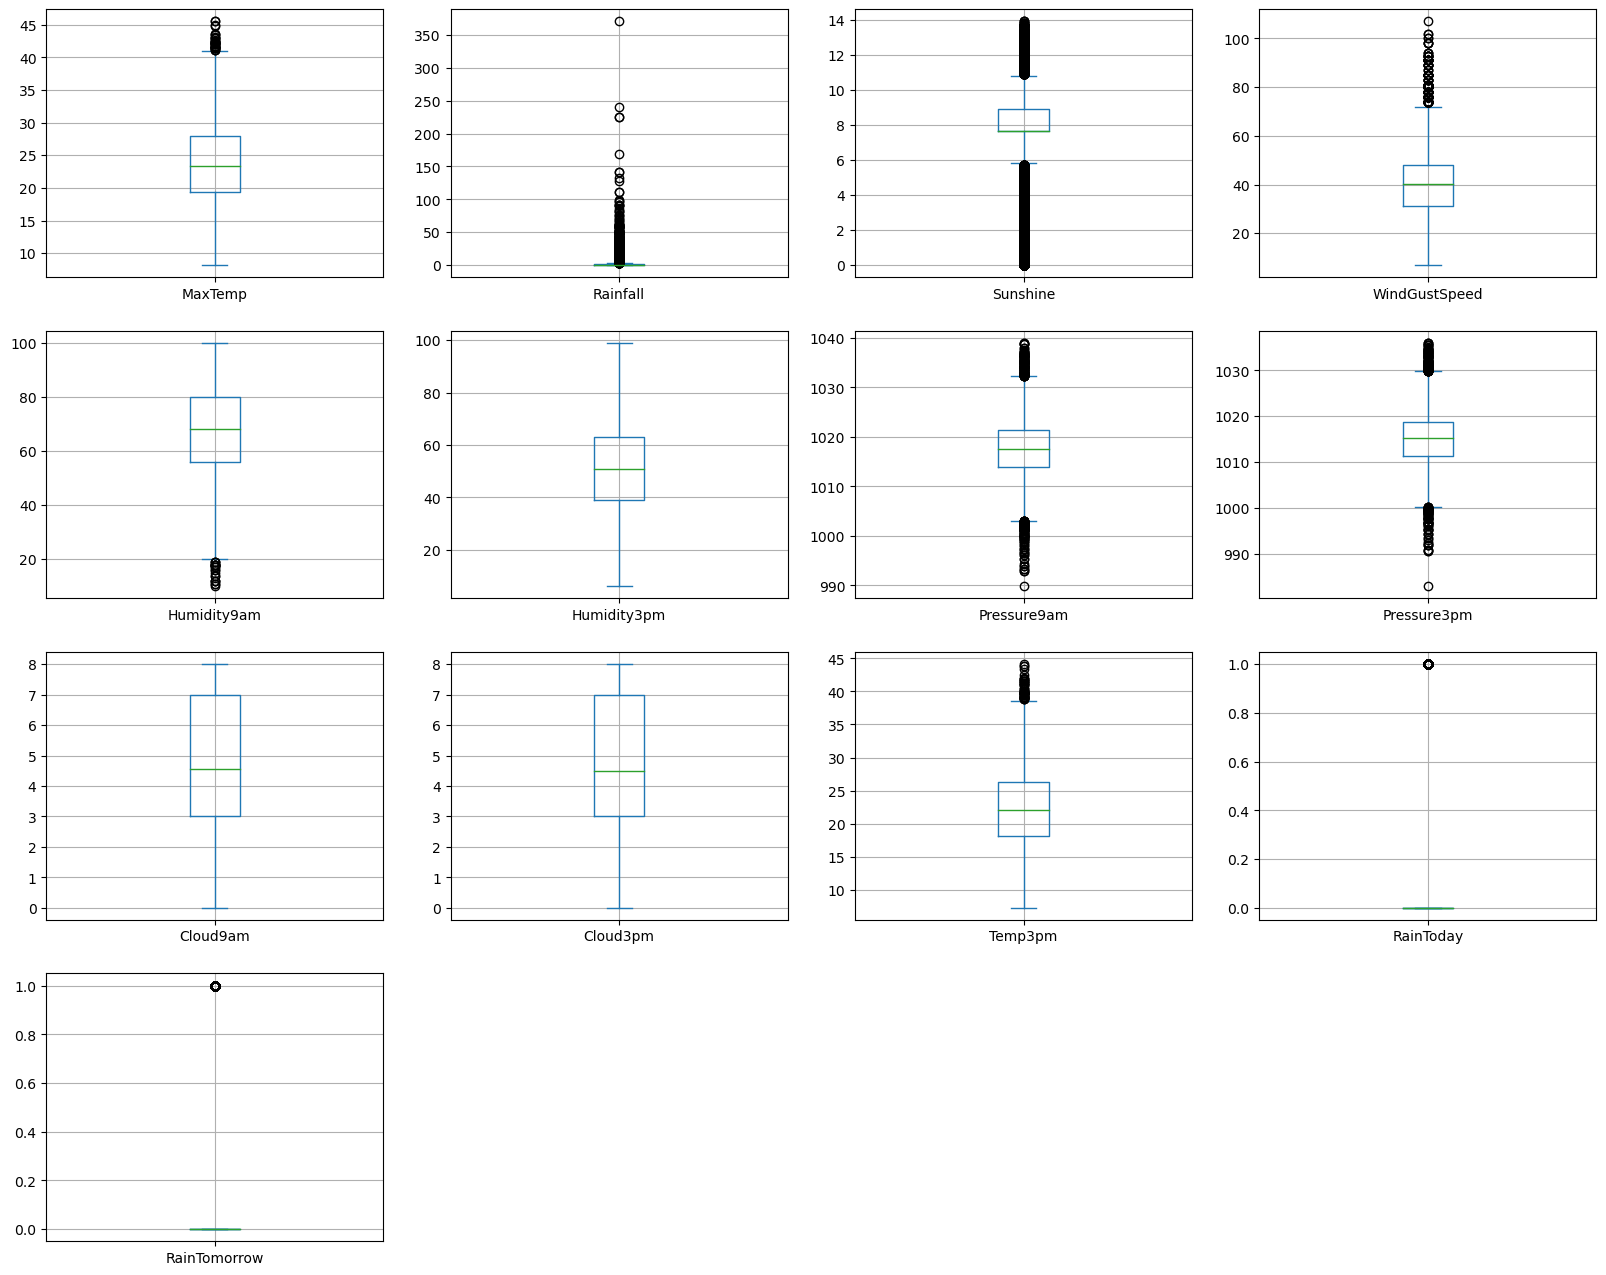

In [64]:
# Outliers Removal:-

df_g1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df_g1))
z

MaxTemp  Rainfall      Sunshine  WindGustSpeed  Humidity9am  \
0     1.570089e-01  0.213986  3.143679e-16       0.277710     0.189439   
1     2.028121e-01  0.272189  3.143679e-16       0.277710     1.420268   
2     3.009450e-01  0.272189  3.143679e-16       0.422897     1.777981   
3     6.771214e-01  0.272189  3.143679e-16       1.174166     1.360650   
4     1.380408e+00  0.175183  3.143679e-16       0.059928     0.845246   
...            ...       ...           ...            ...          ...   
8420  7.523137e-02  0.272189  3.143679e-16       0.666009     1.002937   
8421  2.355231e-01  0.272189  3.143679e-16       1.319354     0.704843   
8422  4.972110e-01  0.272189  3.143679e-16       0.230447     0.883699   
8423  5.135665e-01  0.272189  3.143679e-16       0.883791     1.002937   
8424  5.810639e-16  0.272189  3.143679e-16       0.000000     0.347130   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am      Cloud3pm   Temp3pm  \
0        1.597406     1.584003     1.308665  1.413459  3.862851e-16  0.108138   
1        1.433568     1.121880     1.196072  0.000000  3.862851e-16  0.312348   
2        1.160505     1.599939     1.051309  0.000000  1.088680e+00  0.127334   
3        1.925081     0.006411     0.391836  0.000000  3.862851e-16  0.682376   
4        0.996668     1.090010     1.485596  1.001777  1.520830e+00  1.220599   
...           ...          ...          ...       ...           ...       ...   
8420     1.488181     1.109058     0.814518  0.000000  3.862851e-16  0.007221   
8421     1.652018     0.933770     0.621501  0.000000  3.862851e-16  0.345987   
8422     1.488181     0.535388     0.251553  0.000000  3.862851e-16  0.615099   
8423     1.488181     0.280424     0.203299  0.644950  1.088680e+00  0.598279   
8424     0.832830     0.407906     0.428485  1.413459  1.520830e+00  0.259513   

      RainToday  RainTomorrow  
0      0.556099      0.556282  
1      0.556099      0.556282  
2      0.556099      0.556282  
3      0.556099      0.556282  
4      0.556099      0.556282  
...         ...           ...  
8420   0.556099      0.556282  
8421   0.556099      0.556282  
8422   0.556099      0.556282  
8423   0.556099      0.556282  
8424   0.556099      0.556282  

[8425 rows x 13 columns]

In [66]:
# index no.

np.where(z>3)

(array([  12,   12,   44,   44,   52,   60,   60,   61,   61,   62,   62,
          62,   67,   68,   68,  123,  267,  296,  381,  405,  406,  407,
         407,  431,  462,  563,  568,  568,  569,  602,  683,  683,  699,
         713,  748,  748,  770,  796,  797,  802,  928,  935,  949,  979,
         980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203,
        1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
        1513, 1661, 1673, 1680, 1774, 1819, 1873, 2063, 2108, 2116, 2201,
        2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676,
        2677, 2735, 2849, 2859, 2890, 2898, 2900, 2901, 2909, 3003, 3051,
        3051, 3058, 3059, 3059, 3060, 3066, 3067, 3070, 3082, 3089, 3099,
        3167, 3212, 3234, 3248, 3271, 3278, 3291, 3291, 3302, 3302, 3303,
        3350, 3419, 3421, 3430, 3449, 3449, 3449, 3449, 3450, 3450, 3491,
        3571, 3602, 3603, 3607, 3621, 3701, 3711, 3742, 3750, 3752, 3753,
        3761, 3855, 3903, 3903, 3910, 

In [67]:
dfg1_new=df_g1[(z<3).all(axis=1)]
dfg1_new

MaxTemp  Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0     22.900000       0.6  7.632205      44.000000         71.0         22.0   
1     25.100000       0.0  7.632205      44.000000         44.0         25.0   
2     25.700000       0.0  7.632205      46.000000         38.0         30.0   
3     28.000000       0.0  7.632205      24.000000         45.0         16.0   
4     32.300000       1.0  7.632205      41.000000         82.0         33.0   
...         ...       ...       ...            ...          ...          ...   
8420  23.400000       0.0  7.632205      31.000000         51.0         24.0   
8421  25.300000       0.0  7.632205      22.000000         56.0         21.0   
8422  26.900000       0.0  7.632205      37.000000         53.0         24.0   
8423  27.000000       0.0  7.632205      28.000000         51.0         24.0   
8424  23.859976       0.0  7.632205      40.174469         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  \
0          1007.7       1007.1  8.000000  4.503183     21.8          0   
1          1010.6       1007.8  4.566622  4.503183     24.3          0   
2          1007.6       1008.7  4.566622  2.000000     23.2          0   
3          1017.6       1012.8  4.566622  4.503183     26.5          0   
4          1010.8       1006.0  7.000000  8.000000     29.7          0   
...           ...          ...       ...       ...      ...        ...   
8420       1024.6       1020.3  4.566622  4.503183     22.4          0   
8421       1023.5       1019.1  4.566622  4.503183     24.5          0   
8422       1021.0       1016.8  4.566622  4.503183     26.1          0   
8423       1019.4       1016.5  3.000000  2.000000     26.0          0   
8424       1020.2       1017.9  8.000000  8.000000     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             0  

[8156 rows x 13 columns]

In [68]:
df_g1.shape

(8425, 13)

In [69]:
dfg1_new.shape

(8156, 13)

In [70]:
# percentage data loss:-

loss_percent=(8425-8156)/(8425*100)
print(loss_percent,'%')

0.0003192878338278932 %


In [71]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(df_g1,method='yeo-johnson')
X1

array([[-0.07714137,  0.53423603, -0.082709  , ..., -0.02721805,
        -0.55609919, -0.55628212],
       [ 0.28034646, -0.69852894, -0.082709  , ...,  0.38526239,
        -0.55609919, -0.55628212],
       [ 0.3743678 , -0.69852894, -0.082709  , ...,  0.20714517,
        -0.55609919, -0.55628212],
       ...,
       [ 0.55830718, -0.69852894, -0.082709  , ...,  0.66632192,
        -0.55609919, -0.55628212],
       [ 0.5733979 , -0.69852894, -0.082709  , ...,  0.65102678,
        -0.55609919, -0.55628212],
       [ 0.08141189, -0.69852894, -0.082709  , ..., -0.18278818,
        -0.55609919, -0.55628212]])

In [72]:
X1.ndim

2

In [73]:
X1.mean()

-1.3696396473286679e-15

In [74]:
X1.std()

1.0

In [75]:
x=dfg1_new.drop(['RainTomorrow'],axis=1)
x

MaxTemp  Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0     22.900000       0.6  7.632205      44.000000         71.0         22.0   
1     25.100000       0.0  7.632205      44.000000         44.0         25.0   
2     25.700000       0.0  7.632205      46.000000         38.0         30.0   
3     28.000000       0.0  7.632205      24.000000         45.0         16.0   
4     32.300000       1.0  7.632205      41.000000         82.0         33.0   
...         ...       ...       ...            ...          ...          ...   
8420  23.400000       0.0  7.632205      31.000000         51.0         24.0   
8421  25.300000       0.0  7.632205      22.000000         56.0         21.0   
8422  26.900000       0.0  7.632205      37.000000         53.0         24.0   
8423  27.000000       0.0  7.632205      28.000000         51.0         24.0   
8424  23.859976       0.0  7.632205      40.174469         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  
0          1007.7       1007.1  8.000000  4.503183     21.8          0  
1          1010.6       1007.8  4.566622  4.503183     24.3          0  
2          1007.6       1008.7  4.566622  2.000000     23.2          0  
3          1017.6       1012.8  4.566622  4.503183     26.5          0  
4          1010.8       1006.0  7.000000  8.000000     29.7          0  
...           ...          ...       ...       ...      ...        ...  
8420       1024.6       1020.3  4.566622  4.503183     22.4          0  
8421       1023.5       1019.1  4.566622  4.503183     24.5          0  
8422       1021.0       1016.8  4.566622  4.503183     26.1          0  
8423       1019.4       1016.5  3.000000  2.000000     26.0          0  
8424       1020.2       1017.9  8.000000  8.000000     20.9          0  

[8156 rows x 12 columns]

In [76]:
y=dfg1_new['RainTomorrow']
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8156, dtype: int32

# Oversampling to resolve imbalancing of the dataset

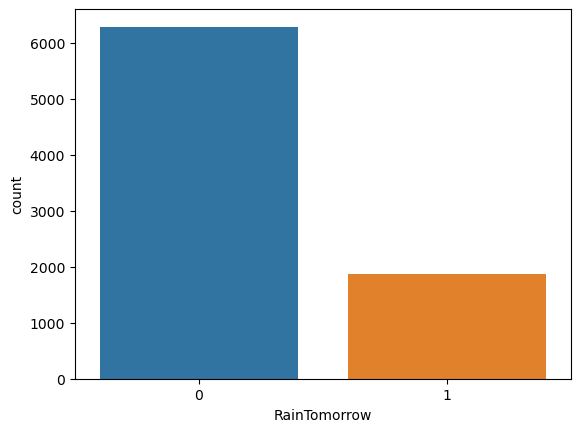

In [77]:
sns.countplot(x=y)
plt.show()

In [78]:
y.value_counts()

RainTomorrow
0    6292
1    1864
Name: count, dtype: int64

In [79]:
x.shape

(8156, 12)

In [80]:
y.shape

(8156,)

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [83]:
y_traint.value_counts()

RainTomorrow
0    6292
1    6292
Name: count, dtype: int64

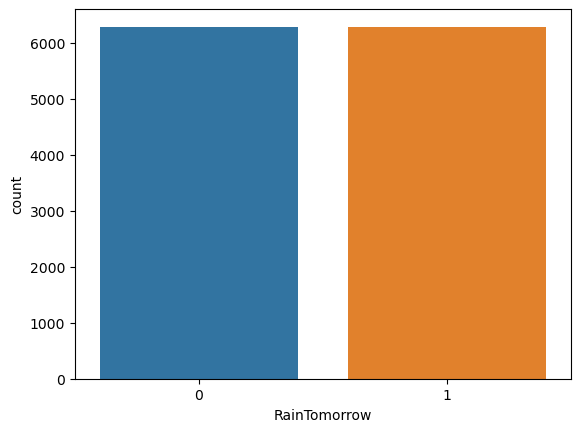

In [84]:
sns.countplot(x=y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing Process

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [86]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.7679777512912197 random_state 1


max_accuracy 0.7679777512912197 max_random_state 1
accuracy 0.7580452920143027 random_state 2


accuracy 0.766388557806913 random_state 3


accuracy 0.7469209376241558 random_state 4


accuracy 0.7651966626936829 random_state 5


accuracy 0.7532777115613826 random_state 6


accuracy 0.7516885180770759 random_state 7


accuracy 0.7461263408820024 random_state 8


accuracy 0.752880413190306 random_state 9


accuracy 0.7707588398887565 random_state 10


max_accuracy 0.7707588398887565 max_random_state 10
accuracy 0.7592371871275327 random_state 11


accuracy 0.7477155343663091 random_state 12


accuracy 0.7477155343663091 random_state 13


accuracy 0.7433452522844657 random_state 14


accuracy 0.7524831148192292 random_state 15


accuracy 0.7584425903853794 random_state 16


accuracy 0.754072308303536 random_state 17


accuracy 0.7338100913786253 random_state 18


accuracy 0.7620182757250695 random_state 19


accuracy 0.7504966229638459 random_

In [87]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.7731426301152166 on Random_state 143


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=139)

In [89]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 84.43627450980392
[[1206   67]
 [ 187  172]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1273
           1       0.72      0.48      0.58       359

    accuracy                           0.84      1632
   macro avg       0.79      0.71      0.74      1632
weighted avg       0.83      0.84      0.83      1632



In [90]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 83.70098039215686
[[1228   45]
 [ 221  138]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1273
           1       0.75      0.38      0.51       359

    accuracy                           0.84      1632
   macro avg       0.80      0.67      0.71      1632
weighted avg       0.83      0.84      0.82      1632



In [91]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 85.41666666666666
[[1158  115]
 [ 123  236]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1273
           1       0.67      0.66      0.66       359

    accuracy                           0.85      1632
   macro avg       0.79      0.78      0.79      1632
weighted avg       0.85      0.85      0.85      1632



In [92]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 89.52205882352942
[[1237   36]
 [ 135  224]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1273
           1       0.86      0.62      0.72       359

    accuracy                           0.90      1632
   macro avg       0.88      0.80      0.83      1632
weighted avg       0.89      0.90      0.89      1632



In [93]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 85.17156862745098
[[1210   63]
 [ 179  180]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1273
           1       0.74      0.50      0.60       359

    accuracy                           0.85      1632
   macro avg       0.81      0.73      0.75      1632
weighted avg       0.84      0.85      0.84      1632



In [94]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 85.96813725490196
[[1220   53]
 [ 176  183]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1273
           1       0.78      0.51      0.62       359

    accuracy                           0.86      1632
   macro avg       0.82      0.73      0.76      1632
weighted avg       0.85      0.86      0.85      1632



In [95]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.79485347 0.72694782 0.75321888 0.67596567 0.68741059 0.67739628
 0.75822604 0.8304721  0.81688126]
Mean of Cross validation score: 0.7468191224537727
Accuracy 84.43627450980392


In [96]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.79699786 0.7691208  0.70314735 0.80543634 0.80114449 0.82546495
 0.8211731  0.8962804  0.8769671 ]
Mean of Cross validation score: 0.8106369322320631
Accuracy 83.70098039215686


In [97]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.71622588 0.79699786 0.6316166  0.93204578 0.97067239 0.93204578
 0.9055794  0.89699571 0.8769671 ]
Mean of Cross validation score: 0.8510162753353014
Accuracy 85.41666666666666


In [98]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.78556112 0.84846319 0.64949928 0.96781116 0.98998569 0.95779685
 0.94492132 0.95922747 0.93133047]
Mean of Cross validation score: 0.8927329499043815
Accuracy 89.52205882352942


In [99]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_traint,y_traint,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.70836312 0.68763402 0.72389127 0.80114449 0.81402003 0.77253219
 0.81759657 0.89842632 0.84763948]
Mean of Cross validation score: 0.7856941664965177
Accuracy 85.17156862745098


In [100]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.73552538 0.72623302 0.69027182 0.8204578  0.84406295 0.80400572
 0.85407725 0.91988555 0.89556509]
Mean of Cross validation score: 0.8100093976793152
Accuracy 85.96813725490196


Therefore the difference between cv score and r2 score in very less in case of Logistic Regression that is [0.844-0.825=0.019],So we will choose this model for further process.

# Hyperparameter Tuning

In [101]:
RandomForestClassifier()


RandomForestClassifier()

In [102]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400]}

In [103]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=2,
                scoring=accuracy_score)

In [104]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [105]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x,y,cv=6)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8339975475168608
Accuracy_Score 0.8419117647058824
Cross_Val_Score 83.39975475168609


In [106]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

# Saving the Model_1

In [107]:
import pickle
filename='Rain_Tomorrow_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [108]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Rainfall_Tomorrow_Prediction=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Rainfall_Tomorrow_Prediction

original  predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0
...        ...        ...
1627         0          0
1628         0          0
1629         0          0
1630         1          1
1631         0          0

[1632 rows x 2 columns]

In [109]:
# 2. Checking the Correlation with respect to second target variable(Rainfall):-

df_g.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Date             0.004945
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

Therefore,'Temp9am','Date','Location','Temp3pm','MaxTemp','Evaporation','WindSpeed3pm','WindDir3pm','WindGustDir' and 'Temp3pm' are less correlated with the target variable.

Making new dataframe in terms of Rainfall analysis:-

In [110]:
df_g2=df_g.drop(['Temp9am','Date','Location','Temp3pm','MaxTemp','Evaporation','WindSpeed3pm','WindDir3pm','WindGustDir',
                 'Temp3pm'],axis=1)
df_g2

MinTemp  Rainfall  Sunshine  WindGustSpeed  WindDir9am  WindSpeed9am  \
0        13.4       0.6  7.632205      44.000000          13          20.0   
1         7.4       0.0  7.632205      44.000000           6           4.0   
2        12.9       0.0  7.632205      46.000000          13          19.0   
3         9.2       0.0  7.632205      24.000000           9          11.0   
4        17.5       1.0  7.632205      41.000000           1           7.0   
...       ...       ...       ...            ...         ...           ...   
8420      2.8       0.0  7.632205      31.000000           9          13.0   
8421      3.6       0.0  7.632205      22.000000           9          13.0   
8422      5.4       0.0  7.632205      37.000000           9           9.0   
8423      7.8       0.0  7.632205      28.000000          10          13.0   
8424     14.9       0.0  7.632205      40.174469           2          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1            44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2            38.0         30.0       1007.6       1008.7  4.566622  2.000000   
3            45.0         16.0       1017.6       1012.8  4.566622  4.503183   
4            82.0         33.0       1010.8       1006.0  7.000000  8.000000   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3  4.566622  4.503183   
8421         56.0         21.0       1023.5       1019.1  4.566622  4.503183   
8422         53.0         24.0       1021.0       1016.8  4.566622  4.503183   
8423         51.0         24.0       1019.4       1016.5  3.000000  2.000000   
8424         62.0         36.0       1020.2       1017.9  8.000000  8.000000   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8425 rows x 14 columns]

In [111]:
df_g2.shape

(8425, 14)

In [112]:
df_g2.columns

Index(['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindDir9am',
       'WindSpeed9am', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [113]:
# checking for the skewness:-

df_g2.skew()

MinTemp          -0.089989
Rainfall         13.218403
Sunshine         -0.716525
WindGustSpeed     0.757000
WindDir9am        0.172792
WindSpeed9am      0.960591
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

Above observations shows that 'Rainfall','WindGustSpeed','WindDir9am' and 'Humidity9am' are higly skewed.

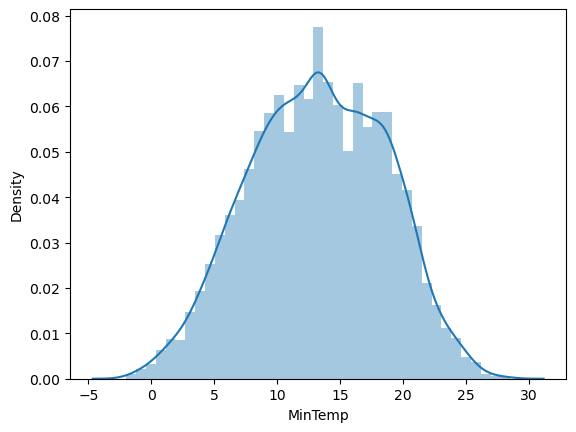

In [114]:
sns.distplot(df_g2['MinTemp'])
plt.show()

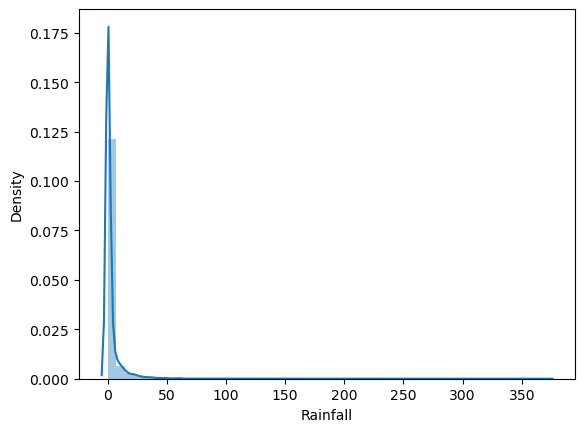

In [115]:
sns.distplot(df_g2['Rainfall'])
plt.show()

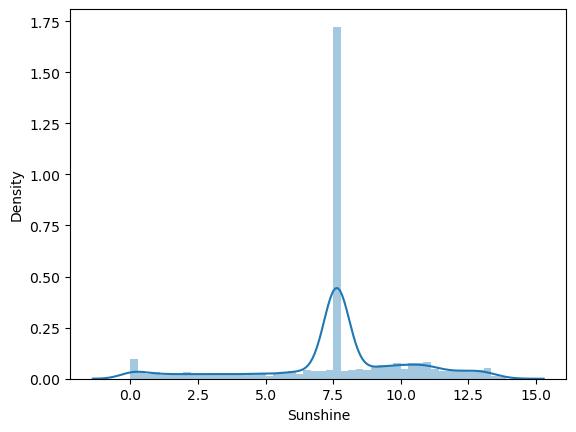

In [116]:
sns.distplot(df_g2['Sunshine'])
plt.show()

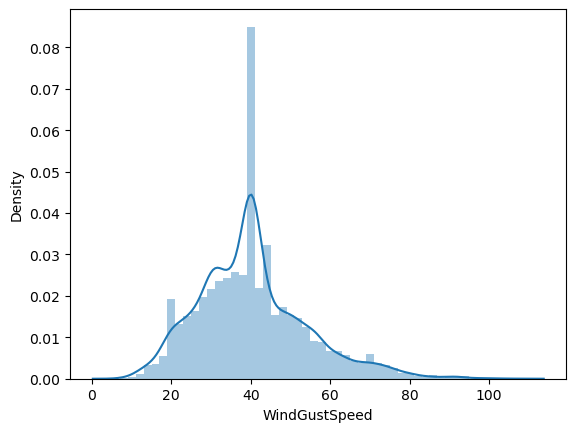

In [117]:
sns.distplot(df_g2['WindGustSpeed'])
plt.show()

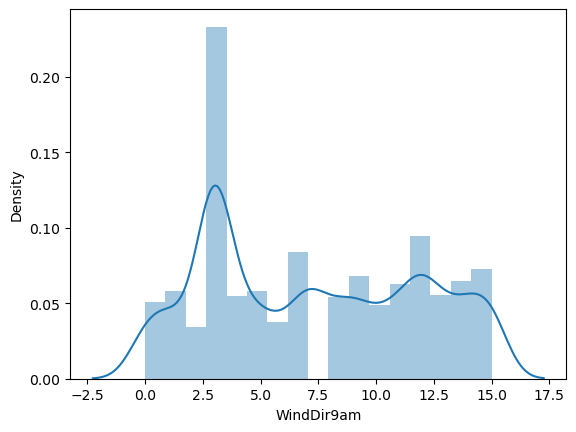

In [118]:
sns.distplot(df_g2['WindDir9am'])
plt.show()

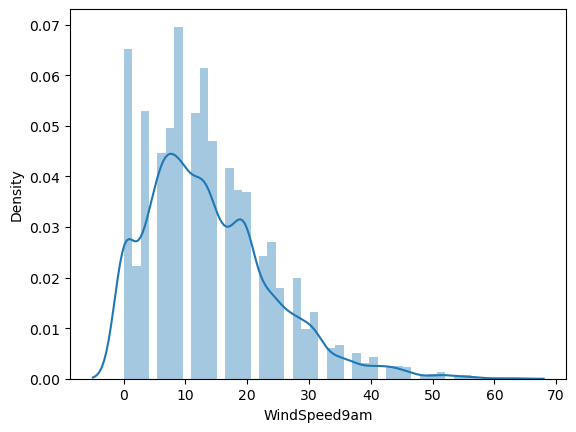

In [119]:
sns.distplot(df_g2['WindSpeed9am'])
plt.show()

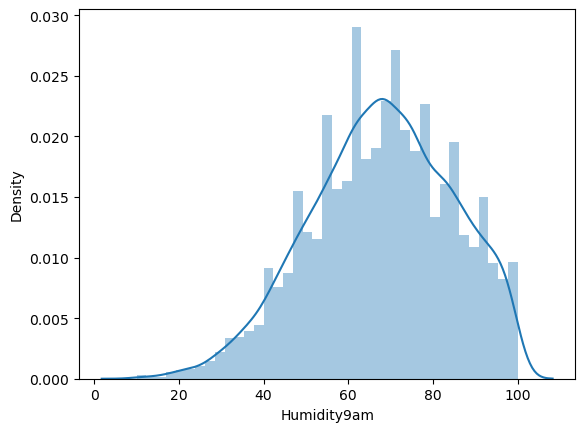

In [120]:
sns.distplot(df_g2['Humidity9am'])
plt.show()

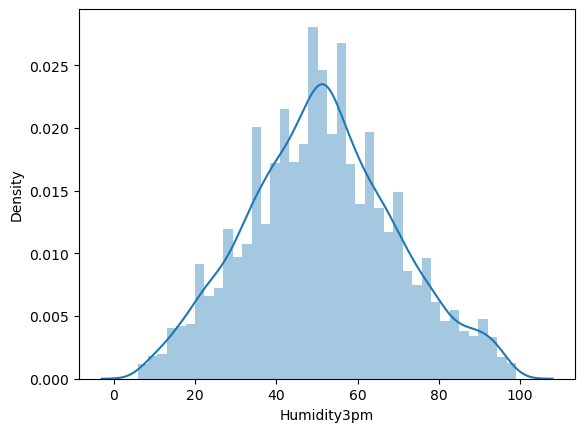

In [121]:
sns.distplot(df_g2['Humidity3pm'])
plt.show()

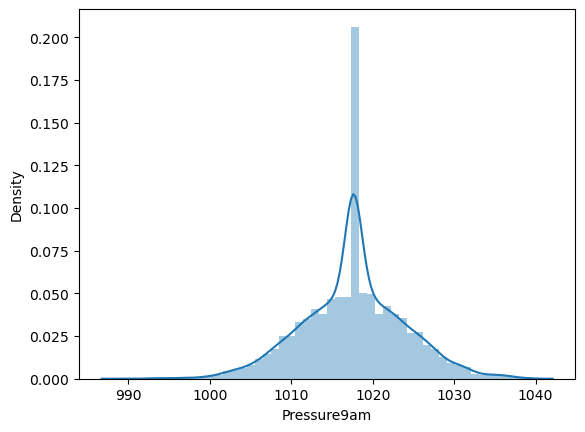

In [122]:
sns.distplot(df_g2['Pressure9am'])
plt.show()

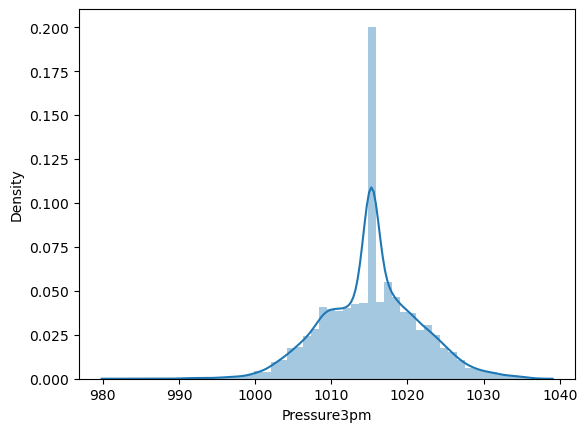

In [123]:
sns.distplot(df_g2['Pressure3pm'])
plt.show()

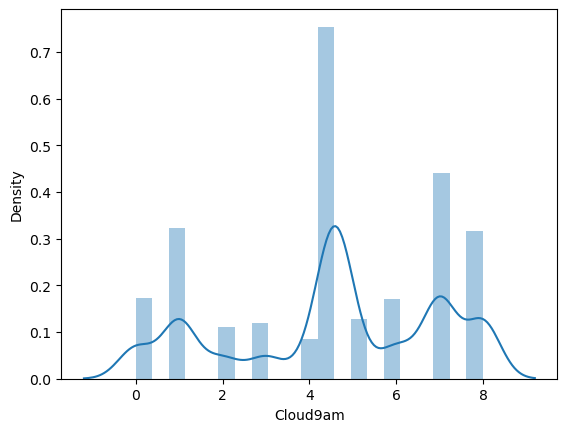

In [124]:
sns.distplot(df_g2['Cloud9am'])
plt.show()

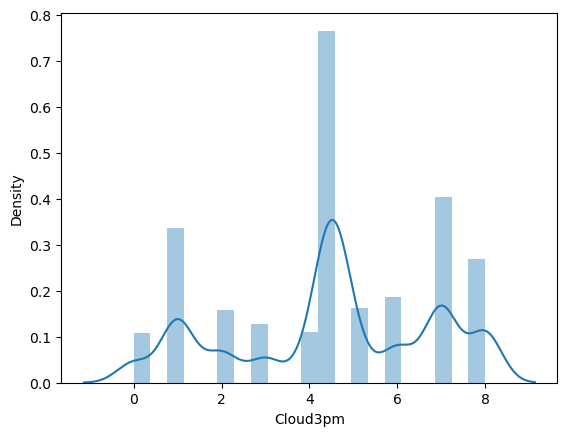

In [125]:
sns.distplot(df_g2['Cloud3pm'])
plt.show()

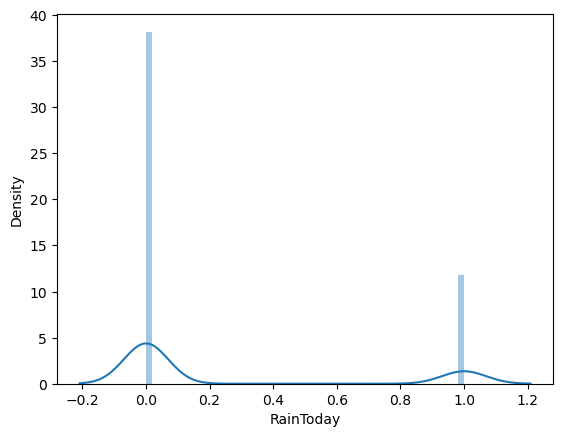

In [126]:
sns.distplot(df_g2['RainToday'])
plt.show()

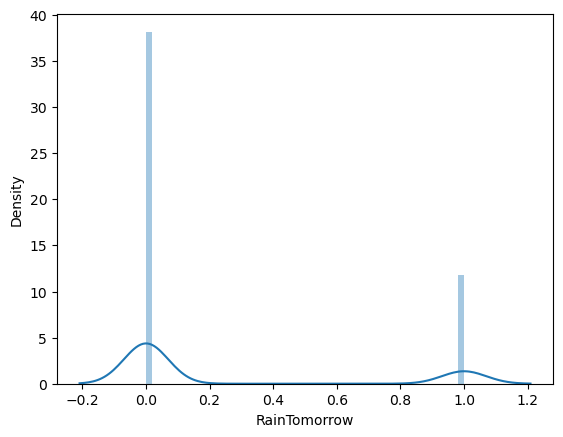

In [127]:
sns.distplot(df_g2['RainTomorrow'])
plt.show()

Above visualizations shows that the is not normalized. The building blocks is out of normalized curve.

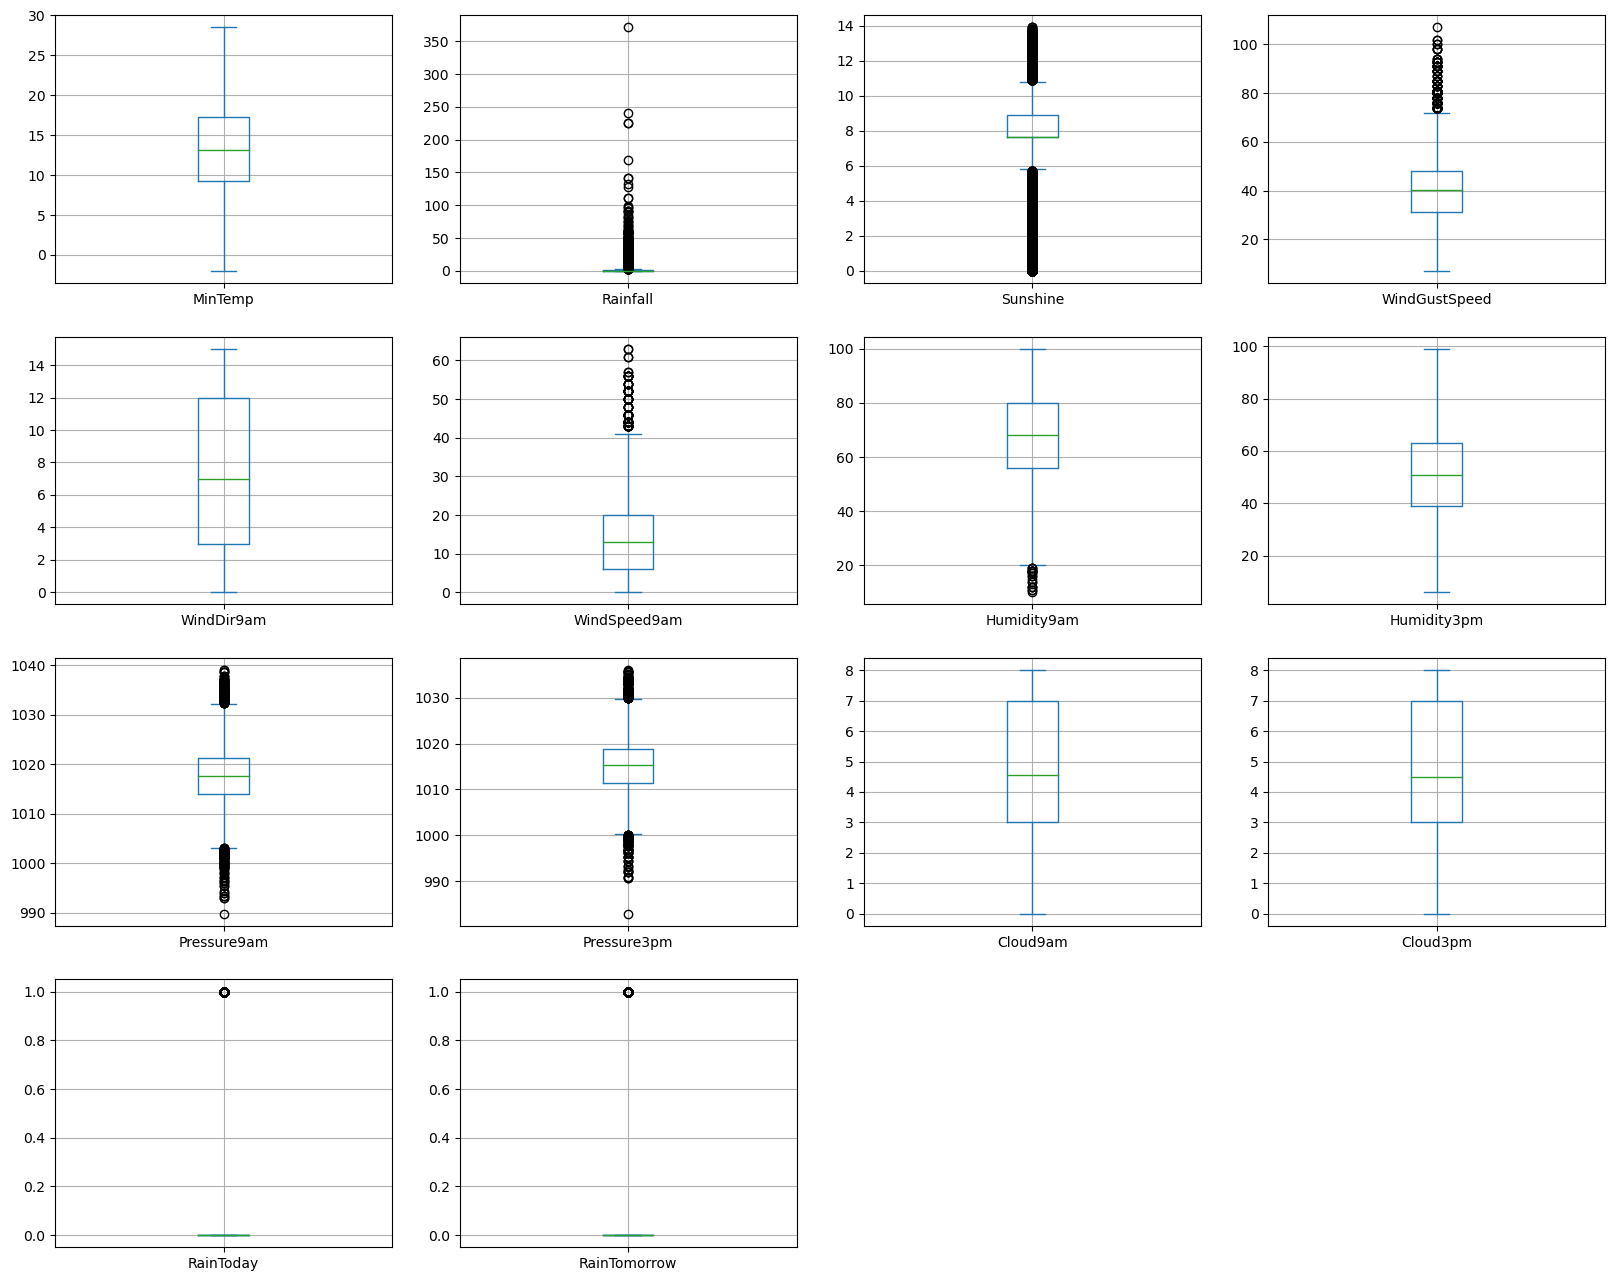

In [128]:
# Outliers Removal:-

df_g2.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df_g2))
z

MinTemp  Rainfall      Sunshine  WindGustSpeed  WindDir9am  \
0     0.038425  0.213986  3.143679e-16       0.277710    1.249535   
1     1.076989  0.272189  3.143679e-16       0.277710    0.276260   
2     0.054526  0.272189  3.143679e-16       0.422897    1.249535   
3     0.742365  0.272189  3.143679e-16       1.174166    0.377652   
4     0.800625  0.175183  3.143679e-16       0.059928    1.366114   
...        ...       ...           ...            ...         ...   
8420  1.932140  0.272189  3.143679e-16       0.666009    0.377652   
8421  1.783418  0.272189  3.143679e-16       1.319354    0.377652   
8422  1.448794  0.272189  3.143679e-16       0.230447    0.377652   
8423  1.002628  0.272189  3.143679e-16       0.883791    0.595623   
8424  0.317279  0.272189  3.143679e-16       0.000000    1.148143   

      WindSpeed9am  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0         0.607461     0.189439     1.597406     1.584003     1.308665   
1         0.972321     1.420268     1.433568     1.121880     1.196072   
2         0.508725     1.777981     1.160505     1.599939     1.051309   
3         0.281166     1.360650     1.925081     0.006411     0.391836   
4         0.676112     0.845246     0.996668     1.090010     1.485596   
...            ...          ...          ...          ...          ...   
8420      0.083694     1.002937     1.488181     1.109058     0.814518   
8421      0.083694     0.704843     1.652018     0.933770     0.621501   
8422      0.478639     0.883699     1.488181     0.535388     0.251553   
8423      0.083694     1.002937     1.488181     0.280424     0.203299   
8424      0.311252     0.347130     0.832830     0.407906     0.428485   

      Cloud9am      Cloud3pm  RainToday  RainTomorrow  
0     1.413459  3.862851e-16   0.556099      0.556282  
1     0.000000  3.862851e-16   0.556099      0.556282  
2     0.000000  1.088680e+00   0.556099      0.556282  
3     0.000000  3.862851e-16   0.556099      0.556282  
4     1.001777  1.520830e+00   0.556099      0.556282  
...        ...           ...        ...           ...  
8420  0.000000  3.862851e-16   0.556099      0.556282  
8421  0.000000  3.862851e-16   0.556099      0.556282  
8422  0.000000  3.862851e-16   0.556099      0.556282  
8423  0.644950  1.088680e+00   0.556099      0.556282  
8424  1.413459  1.520830e+00   0.556099      0.556282  

[8425 rows x 14 columns]

In [130]:
# index no.

np.where(z>3)

(array([  12,   12,   52,   62,  123,  267,  296,  381,  431,  462,  563,
         568,  568,  569,  602,  683,  683,  699,  713,  748,  748,  770,
         796,  797,  802,  928,  935,  949,  979,  980,  980,  980, 1008,
        1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203, 1237, 1241, 1264,
        1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1661,
        1673, 1680, 1774, 1819, 1873, 1903, 1945, 2016, 2063, 2074, 2108,
        2116, 2186, 2201, 2219, 2231, 2265, 2429, 2488, 2500, 2505, 2541,
        2593, 2676, 2677, 2735, 2849, 2890, 2898, 2900, 2901, 2909, 3003,
        3051, 3051, 3058, 3059, 3059, 3060, 3066, 3067, 3067, 3068, 3070,
        3082, 3082, 3089, 3089, 3099, 3167, 3212, 3234, 3248, 3303, 3350,
        3419, 3421, 3430, 3449, 3449, 3449, 3449, 3450, 3450, 3491, 3557,
        3571, 3602, 3603, 3607, 3621, 3701, 3742, 3750, 3752, 3753, 3761,
        3855, 3903, 3903, 3910, 3911, 3911, 3912, 3918, 3919, 3919, 3920,
        3922, 3934, 3934, 3941, 3941, 

In [131]:
dfg2_new=df_g2[(z<3).all(axis=1)]
dfg2_new

MinTemp  Rainfall  Sunshine  WindGustSpeed  WindDir9am  WindSpeed9am  \
0        13.4       0.6  7.632205      44.000000          13          20.0   
1         7.4       0.0  7.632205      44.000000           6           4.0   
2        12.9       0.0  7.632205      46.000000          13          19.0   
3         9.2       0.0  7.632205      24.000000           9          11.0   
4        17.5       1.0  7.632205      41.000000           1           7.0   
...       ...       ...       ...            ...         ...           ...   
8420      2.8       0.0  7.632205      31.000000           9          13.0   
8421      3.6       0.0  7.632205      22.000000           9          13.0   
8422      5.4       0.0  7.632205      37.000000           9           9.0   
8423      7.8       0.0  7.632205      28.000000          10          13.0   
8424     14.9       0.0  7.632205      40.174469           2          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1            44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2            38.0         30.0       1007.6       1008.7  4.566622  2.000000   
3            45.0         16.0       1017.6       1012.8  4.566622  4.503183   
4            82.0         33.0       1010.8       1006.0  7.000000  8.000000   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3  4.566622  4.503183   
8421         56.0         21.0       1023.5       1019.1  4.566622  4.503183   
8422         53.0         24.0       1021.0       1016.8  4.566622  4.503183   
8423         51.0         24.0       1019.4       1016.5  3.000000  2.000000   
8424         62.0         36.0       1020.2       1017.9  8.000000  8.000000   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[8115 rows x 14 columns]

In [132]:
df_g2.shape

(8425, 14)

In [133]:
dfg2_new.shape

(8115, 14)

In [134]:
# percentage data loss:-

loss_percent=(8425-8115)/(8425*100)
print(loss_percent,'%')

0.00036795252225519287 %


In [135]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X2=power_transform(df_g2,method='yeo-johnson')
X2

array([[ 0.04112367,  0.53423603, -0.082709  , ..., -0.01650563,
        -0.55609919, -0.55628212],
       [-1.07628109, -0.69852894, -0.082709  , ..., -0.01650563,
        -0.55609919, -0.55628212],
       [-0.05171292, -0.69852894, -0.082709  , ..., -1.09476091,
        -0.55609919, -0.55628212],
       ...,
       [-1.45084117, -0.69852894, -0.082709  , ..., -0.01650563,
        -0.55609919, -0.55628212],
       [-1.00152086, -0.69852894, -0.082709  , ..., -1.09476091,
        -0.55609919, -0.55628212],
       [ 0.31938327, -0.69852894, -0.082709  , ...,  1.54762133,
        -0.55609919, -0.55628212]])

In [136]:
X2.ndim

2

In [137]:
X2.std()

1.0

In [138]:
x1=dfg2_new.drop(['Rainfall'],axis=1)
x1

MinTemp  Sunshine  WindGustSpeed  WindDir9am  WindSpeed9am  Humidity9am  \
0        13.4  7.632205      44.000000          13          20.0         71.0   
1         7.4  7.632205      44.000000           6           4.0         44.0   
2        12.9  7.632205      46.000000          13          19.0         38.0   
3         9.2  7.632205      24.000000           9          11.0         45.0   
4        17.5  7.632205      41.000000           1           7.0         82.0   
...       ...       ...            ...         ...           ...          ...   
8420      2.8  7.632205      31.000000           9          13.0         51.0   
8421      3.6  7.632205      22.000000           9          13.0         56.0   
8422      5.4  7.632205      37.000000           9           9.0         53.0   
8423      7.8  7.632205      28.000000          10          13.0         51.0   
8424     14.9  7.632205      40.174469           2          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  RainToday  \
0            22.0       1007.7       1007.1  8.000000  4.503183          0   
1            25.0       1010.6       1007.8  4.566622  4.503183          0   
2            30.0       1007.6       1008.7  4.566622  2.000000          0   
3            16.0       1017.6       1012.8  4.566622  4.503183          0   
4            33.0       1010.8       1006.0  7.000000  8.000000          0   
...           ...          ...          ...       ...       ...        ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183          0   
8421         21.0       1023.5       1019.1  4.566622  4.503183          0   
8422         24.0       1021.0       1016.8  4.566622  4.503183          0   
8423         24.0       1019.4       1016.5  3.000000  2.000000          0   
8424         36.0       1020.2       1017.9  8.000000  8.000000          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             0  

[8115 rows x 13 columns]

In [139]:
y1=dfg2_new['Rainfall']
y1

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8115, dtype: float64

In [140]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [142]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y1,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.49177930884792387
At random state test {0} 0.4804283530137059


Mean-squared-error:  12.558194398860914
Mean-absolute-error:  1.7032950129976543
Root-Mean-squared-error:  3.5437542802599777
R2 SCore:  0.4804283530137059
At random state train {1} 0.4917428802894598
At random state test {1} 0.4721824772961931


Mean-squared-error:  9.349174705390372
Mean-absolute-error:  1.5053995783138856
Root-Mean-squared-error:  3.0576420172071113
R2 SCore:  0.4721824772961931
At random state train {2} 0.49158980024465415
At random state test {2} 0.47268119842682443


Mean-squared-error:  9.266723616047331
Mean-absolute-error:  1.5301220950076968
Root-Mean-squared-error:  3.044129369137805
R2 SCore:  0.47268119842682443
At random state train {3} 0.4873863542396717
At random state test {3} 0.4978714346662423


Mean-squared-error:  11.161394323208473
Mean-absolute-error:  1.6350401290017262
Root-Mean-squared-error:  3.34086730104751
R2 SCore:  0.4978714346662423
At random sta

In [143]:
print('Best accuracy is ',0.525, 'on random_state',97)

Best accuracy is  0.525 on random_state 97


In [144]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y1,test_size=0.20,random_state=97)

In [145]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 47.19358571825495
Mean-squared-error:  11.210210697693537
Mean-absolute-error:  1.5583676175959411
Root-Mean-squared-error:  3.3481652733539806


In [146]:
#lasso regression;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 47.193007597315905
Mean-squared-error:  11.210333426298073
Mean-absolute-error:  1.5581766625784397
Root-Mean-squared-error:  3.348183601043717


In [147]:
#Support vector regressor;


from sklearn.svm import SVR
 
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_svr)*100)
print('Mean-squared-error: ',mse(y_test,pred_svr))
print('Mean-absolute-error: ',mae(y_test,pred_svr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_svr)))

R2 Score 40.88920901803033
Mean-squared-error:  12.548559307202883
Mean-absolute-error:  1.2573087844458988
Root-Mean-squared-error:  3.542394572489474


In [148]:
# Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 37.428257343931016
Mean-squared-error:  13.28328060969815
Mean-absolute-error:  1.121531038059718
Root-Mean-squared-error:  3.6446235209824005


In [149]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 66.40185989835689
Mean-squared-error:  7.132509084606588
Mean-absolute-error:  1.0080272449026026
Root-Mean-squared-error:  2.670675773021987


In [150]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 41.98092632898246
Mean-squared-error:  12.316799941516816
Mean-absolute-error:  1.5791145931460693
Root-Mean-squared-error:  3.509529874714962


In [151]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_scaled,y1,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [0.49050484 0.51464682 0.47390165 0.47027206 0.48546441 0.4030246
 0.43293438 0.56194196 0.51561704]
Mean of Cross validation score: 0.4831453054798494
R2 Score 47.19358571825495


In [152]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x_scaled,y1,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [0.49050577 0.51466347 0.47391989 0.4702615  0.48545472 0.40303263
 0.4329439  0.56193876 0.515599  ]
Mean of Cross validation score: 0.4831466250653128
R2 Score 47.193007597315905


In [153]:
# Cross Validation for support vector regression;

cv_score=cross_val_score(svr,x_scaled,y1,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_svr)*100)

Cross validation support vector Regression model: [0.43795457 0.40914547 0.41455751 0.36414371 0.3836057  0.41373747
 0.35073697 0.43808427 0.41539764]
Mean of Cross validation score: 0.40304036964805046
R2 Score 40.88920901803033


In [154]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x_scaled,y1,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [-0.07786789 -0.26244382  0.01040989  0.84464656  1.          0.79091418
  0.47295333  0.14108545  0.07644617]
Mean of Cross validation score: 0.33290487511801986
R2 Score 37.428257343931016


In [155]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x_scaled,y1,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [0.50322603 0.46204214 0.42600788 0.86011619 0.93340822 0.81109693
 0.66779319 0.56372443 0.50174013]
Mean of Cross validation score: 0.6365727935568491
R2 Score 66.40185989835689


In [156]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x_scaled,y1,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [0.36371202 0.36056495 0.37546214 0.43215333 0.38030128 0.18952708
 0.35971216 0.50449539 0.49660607]
Mean of Cross validation score: 0.38472604619427486
R2 Score 41.98092632898246


Therefore the difference between cv score and r2 score in case of Random Forest Regressor that is [0.666-0.437=0.229],So we will choose this model for further process.

# Hyperparameter Tuning

In [157]:
RandomForestRegressor()

RandomForestRegressor()

In [158]:
rf=RandomForestRegressor(criterion='friedman_mse',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x_scaled,y1,cv=8)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.5545246097306773
R2_Score 0.5356316517723343
Cross_Val_Score 55.45246097306773


So, we are getting our model accuracy(R2 Score) 55 % with almost same cross validation score in our model.

# Saving the Model_2

In [159]:
import pickle
filename='Rainfall_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [160]:
loaded_model=pickle.load(open('Rainfall_Pred.pkl','rb'))

In [161]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

0         1         2         3         4         5     \
Predicted  0.145601  0.147453  0.224978  0.234386  0.169097  0.149426   
Original   0.145601  0.147453  0.224978  0.234386  0.169097  0.149426   

               6         7         8         9     ...      1613      1614  \
Predicted  0.246584  0.025453  0.227184  0.134482  ...  0.229584  0.338213   
Original   0.246584  0.025453  0.227184  0.134482  ...  0.229584  0.338213   

              1615      1616      1617      1618       1619      1620  \
Predicted  0.02507  0.166096  0.144436  0.337224  10.732197  0.176185   
Original   0.02507  0.166096  0.144436  0.337224  10.732197  0.176185   

               1621      1622  
Predicted  0.220314  0.392474  
Original   0.220314  0.392474  

[2 rows x 1623 columns]